In [32]:
import numpy as np, random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

# Q1

In [33]:
import os
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats

current_dir = os.getcwd()

(train_X, train_y), (test_X, test_y) = mnist.load_data(path=current_dir + "/mnist.npz")
test_X = test_X.reshape(test_X.shape[0], -1)
test_X = test_X.astype('float32') / 255.0

test_images = test_X


autoencoder = tf.keras.models.load_model("mnist_AE.h5")
reconstructed_images = autoencoder.predict(test_images)

for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')

    plt.subplot(2, 4, i + 5)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')

plt.show()

print()

def mean_squared_error(image1, image2):
    return np.mean((image1 - image2) ** 2)

mse_values = [mean_squared_error(test_images[i], reconstructed_images[i]) for i in range(len(reconstructed_images))]

plt.hist(mse_values, bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Mean Squared Errors')
plt.show()

print()

mean_mse = np.mean(mse_values)
std_mse = np.std(mse_values)

ks_statistic, p_value = stats.kstest(mse_values, cdf='norm', args=(mean_mse, std_mse))

if p_value < 0.05:
    print('The MSE data does not follow a normal distribution.')
else:
    print('The MSE data can be assumed to follow a normal distribution.')
    
# output is in the report file

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 16: invalid continuation byte

# Q2

R^2 for (main data): 0.9931142293628096
R^2 for (main data + outlier): 0.6943381680789327
R^2 for (main data + leverage): 0.7069879724740984
R^2 for (main data + outlier + leverage): 0.9738367949787373


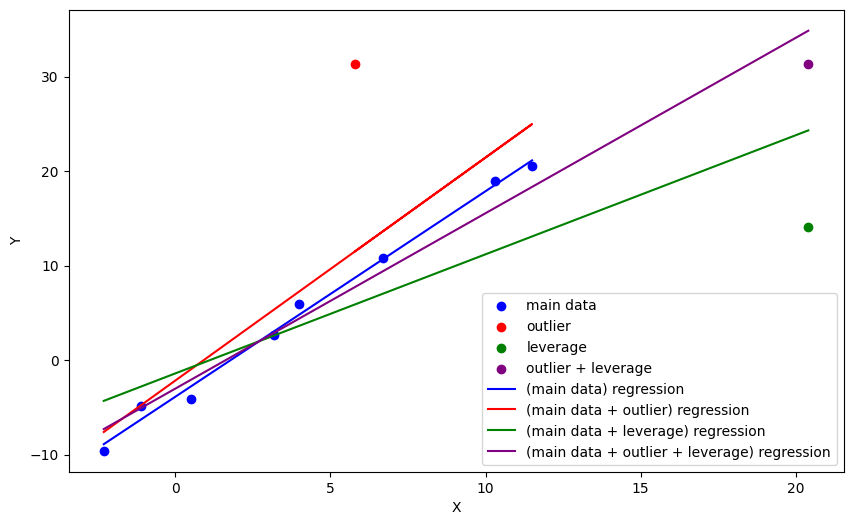

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x_main = np.array([-2.3, -1.1, 0.5, 3.2, 4.0, 6.7, 10.3, 11.5])
y_main = np.array([-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5])

x_outlier = np.array([5.8])
y_outlier = np.array([31.3])

x_leverage = np.array([20.4])
y_leverage = np.array([14.1])

x_outlier_leverage = np.array([20.4])
y_outlier_leverage = np.array([31.3])

def calculate_coefficients(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - m * x_mean

    return m, b

def linear_regression(x, m, b):
    return m * x + b

def calculate_r_squared(y_actual, y_hat):
    y_mean = np.mean(y_actual)
    ss_residual = np.sum((y_hat - y_mean) ** 2)
    ss_total = np.sum((y_actual - y_mean) ** 2)

    r_squared = ss_residual / ss_total
    return r_squared

coeff_main = calculate_coefficients(x_main, y_main)
y_main_hat = linear_regression(x_main, *coeff_main)
r_squared_main = calculate_r_squared(y_main, y_main_hat)

coeff_outlier = calculate_coefficients(np.concatenate((x_main, x_outlier)), np.concatenate((y_main, y_outlier)))
y_outlier_hat = linear_regression(np.concatenate((x_main, x_outlier)), *coeff_outlier)
r_squared_outlier = calculate_r_squared(np.concatenate((y_main, y_outlier)), y_outlier_hat)

coeff_leverage = calculate_coefficients(np.concatenate((x_main, x_leverage)), np.concatenate((y_main, y_leverage)))
y_leverage_hat = linear_regression(np.concatenate((x_main, x_leverage)), *coeff_leverage)
r_squared_leverage = calculate_r_squared(np.concatenate((y_main, y_leverage)), y_leverage_hat)

coeff_outlier_leverage = calculate_coefficients(np.concatenate((x_main, x_outlier_leverage)), np.concatenate((y_main, y_outlier_leverage)))
y_outlier_leverage_hat = linear_regression(np.concatenate((x_main, x_outlier_leverage)), *coeff_outlier_leverage)
r_squared_outlier_leverage = calculate_r_squared(np.concatenate((y_main, y_outlier_leverage)), y_outlier_leverage_hat)

print(f"R^2 for (main data): {r_squared_main}")
print(f"R^2 for (main data + outlier): {r_squared_outlier}")
print(f"R^2 for (main data + leverage): {r_squared_leverage}")
print(f"R^2 for (main data + outlier + leverage): {r_squared_outlier_leverage}")

plt.figure(figsize=(10,6))
plt.scatter(x_main, y_main, label='main data', color='blue')
plt.scatter(x_outlier, y_outlier, label='outlier', color='red')
plt.scatter(x_leverage, y_leverage, label='leverage', color='green')
plt.scatter(x_outlier_leverage, y_outlier_leverage, label='outlier + leverage', color='purple')

plt.plot(x_main, y_main_hat, label='(main data) regression', color='blue')
plt.plot(np.concatenate((x_main, x_outlier)), y_outlier_hat, label='(main data + outlier) regression', color='red')
plt.plot(np.concatenate((x_main, x_leverage)), y_leverage_hat, label='(main data + leverage) regression', color='green')
plt.plot(np.concatenate((x_main, x_outlier_leverage)), y_outlier_leverage_hat, label='(main data + outlier + leverage) regression', color='purple')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Q3

In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")
df

,player_ID,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,...,gk_reflexes,gk_handling,gk_speed,gk_kicking,gk_positoning,pref_foot,att_workrate,def_workrate,weak_foot,skill_moves
0,1,Pelé,Edson Arantes Nascimento,Gold - Rare,Icon,NaN,98,Icons,Icons,Brazil,...,NaN,NaN,NaN,NaN,NaN,Right,High,Med,4,5
1,2,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,97,Icons,Icons,Argentina,...,NaN,NaN,NaN,NaN,NaN,Left,High,Med,3,5
2,3,Ronaldo,Ronaldo Luís Nazário de Lima,Gold - Rare,Icon,NaN,96,Icons,Icons,Brazil,...,NaN,NaN,NaN,NaN,NaN,Right,Med,Med,5,5
3,4,Pelé,Edson Arantes Nascimento,Gold - Rare,Icon,NaN,95,Icons,Icons,Brazil,...,NaN,NaN,NaN,NaN,NaN,Right,High,Med,4,5
4,5,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,95,Icons,Icons,Argentina,...,NaN,NaN,NaN,NaN,NaN,Left,High,Med,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,21632,Batshuayi,Michy Batshuayi,Gold - Rare,FIF,TOTW46,88,Valencia CF,LaLiga Santander,Belgium,...,NaN,NaN,NaN,NaN,NaN,Right,Med,Low,4,3
21557,21633,En-Nesyri,Youssef En-Nesyri,Gold - Rare,IF,TOTW46,77,Málaga CF,LaLiga Santander,Morocco,...,NaN,NaN,NaN,NaN,NaN,Right,Med,Med,4,3
21558,21634,Areola,Alphonse Areola,Gold - Rare,TIF,TOTW46,86,Paris Saint-Germain,Ligue 1 Conforama,France,...,90.0,87.0,65.0,80.0,85.0,Right,Med,Med,3,1
21559,21635,Vargas,Camilo Vargas,Gold - Rare,IF,TOTW46,81,Deportivo Cali,Liga Dimayor,Colombia,...,83.0,80.0,47.0,68.0,75.0,Left,Med,Med,3,1


In [36]:
print(df["pace"].tail()); print()

mean_value_pace = df["pace"].mean()
mean_value_dribbling = df["dribbling"].mean()

df["pace"].fillna(value=mean_value_pace, inplace=True)
df["dribbling"].fillna(value=mean_value_dribbling, inplace=True); print("after filling missing values with mean:)"); print()

print(df["pace"].tail())

21556    88.0
21557    80.0
21558     NaN
21559     NaN
21560    96.0
Name: pace, dtype: float64

after filling missing values with mean:)

21556    88.000000
21557    80.000000
21558    69.897002
21559    69.897002
21560    96.000000
Name: pace, dtype: float64


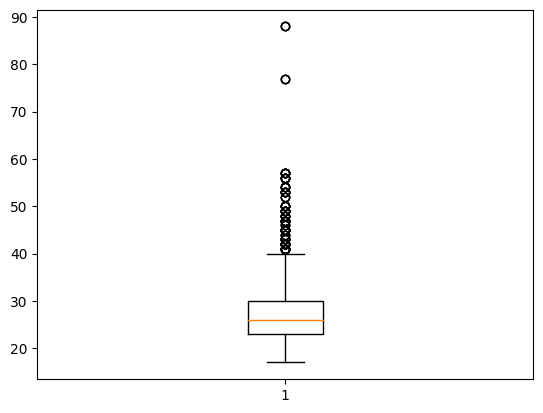

Max: 88, Q3: 30.0, Q2: 26.0, Q1: 23.0, Min: 17


In [37]:
max_value = df['age'].max()
Q3 = df['age'].quantile(0.75)
Q2 = df['age'].median()
Q1 = df['age'].quantile(0.25)
min_value = df['age'].min()

plt.boxplot(df["age"])
plt.show();

print(f"Max: {max_value}, Q3: {Q3}, Q2: {Q2}, Q1: {Q1}, Min: {min_value}")

In [38]:
df["weight"].value_counts()

weight
70     1620
75     1615
78     1181
80     1170
72     1157
73     1122
76     1072
74     1065
77     1053
79      880
68      828
71      736
82      724
83      640
81      624
69      584
85      575
65      569
67      530
84      527
66      405
86      363
64      348
88      318
87      262
90      216
63      213
62      165
89      163
60      138
91      120
92      108
61      103
93       80
94       52
95       45
58       42
59       38
96       24
57       16
97       13
56       10
55        9
98        7
110       5
102       4
100       4
99        3
54        3
52        3
107       2
50        2
101       1
53        1
104       1
106       1
49        1
Name: count, dtype: int64

In [39]:
import numpy as np, random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

sample_weight = df['weight'].sample(100, replace=False)
# print("sample_weight", sample_weight)

mean_weight = np.mean(sample_weight)
variance_weight = np.var(sample_weight)
std_dev_weight = np.std(sample_weight)

print(f"Mean: {mean_weight}, Variance: {variance_weight}, Standard Deviation: {std_dev_weight}")

statistic, p_value = stats.shapiro(sample_weight)

print(f"Statistic: {statistic}, p_value: {p_value}")

if p_value < 0.05:
    print('The MSE data does not follow a normal distribution.')
else:
    print('The MSE data can be assumed to follow a normal distribution.')

Mean: 76.7, Variance: 53.07, Standard Deviation: 7.284915922644544
Statistic: 0.9885591864585876, p_value: 0.5503065586090088
The MSE data can be assumed to follow a normal distribution.


Mean: 76.7, Variance: 53.07, Standard Deviation: 7.284915922644544
p_value= 0.5503065586090088
The MSE data can be assumed to follow a normal distribution.


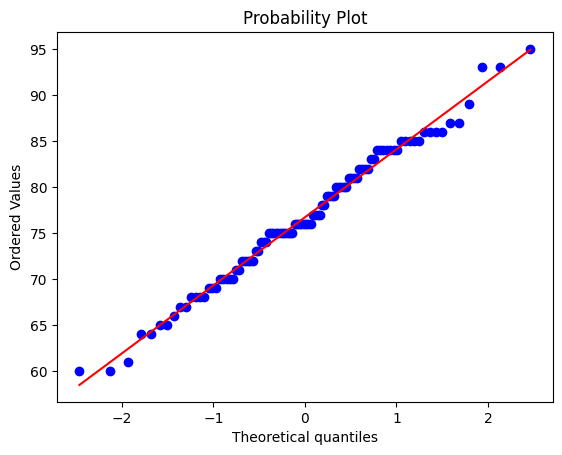

Mean: 76.0, Variance: 54.236, Standard Deviation: 7.364509488078618
p_value= 0.0013178142253309488
The MSE data does not follow a normal distribution.


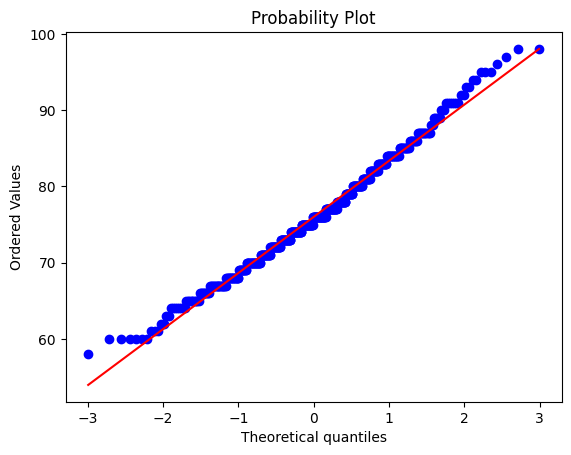

Mean: 75.548, Variance: 51.687695999999995, Standard Deviation: 7.189415553436872
p_value= 2.6769496841438922e-08
The MSE data does not follow a normal distribution.


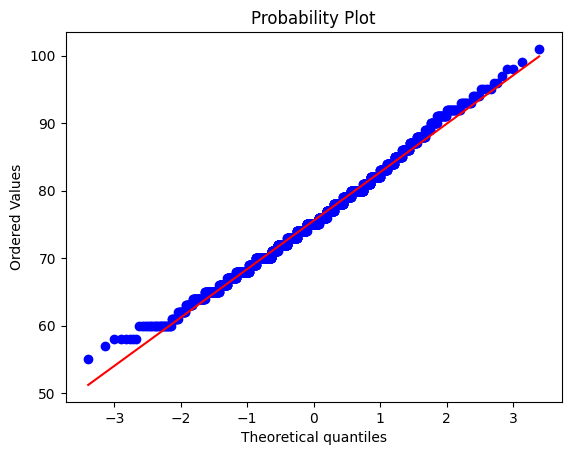

In [40]:
def qq_plot(n):
    set_seed(810109203)
    sample_weight = df['weight'].sample(n=n, replace=False)

    mean_weight = np.mean(sample_weight)
    variance_weight = np.var(sample_weight)
    std_dev_weight = np.std(sample_weight)

    print(f"Mean: {mean_weight}, Variance: {variance_weight}, Standard Deviation: {std_dev_weight}")

    # sample_weight = np.array(sample_weight)

    normal_sample_for_weight = np.random.normal(loc=mean_weight, scale=std_dev_weight, size=n)

    statistic, p_value = stats.shapiro(sample_weight)

    print(f"p_value= {p_value}")
    if p_value < 0.05:
        print('The MSE data does not follow a normal distribution.')
    else:
        print('The MSE data can be assumed to follow a normal distribution.')

    stats.probplot(sample_weight, dist="norm", plot=plt)
    plt.show()

qq_plot(n=100)
qq_plot(n=500)
qq_plot(n=2000)


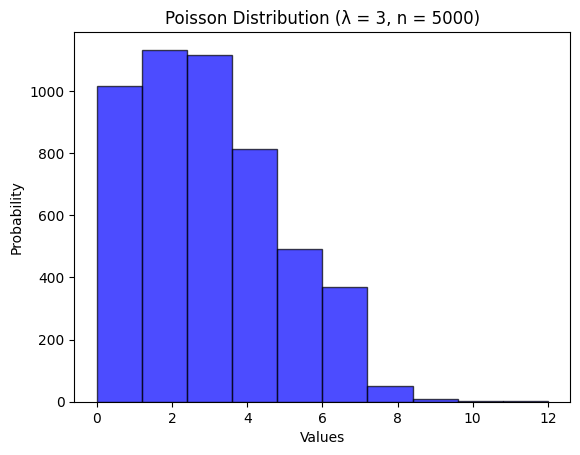

In [41]:
lambda_val = 3
n = 5000
set_seed(810109203)
poisson_samples = np.random.poisson(lambda_val, n)

plt.hist(poisson_samples, alpha=0.7, color='blue', edgecolor="black")
plt.title('Poisson Distribution (λ = 3, n = 5000)')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()

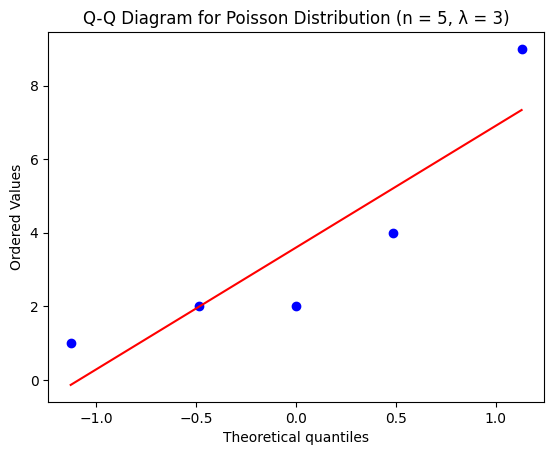


Wilk-Shapiro Test for n = 5, λ = 3:
Statistic: 0.8164581656455994, p_value: 0.10961208492517471
The distribution can be assumed to be normal.


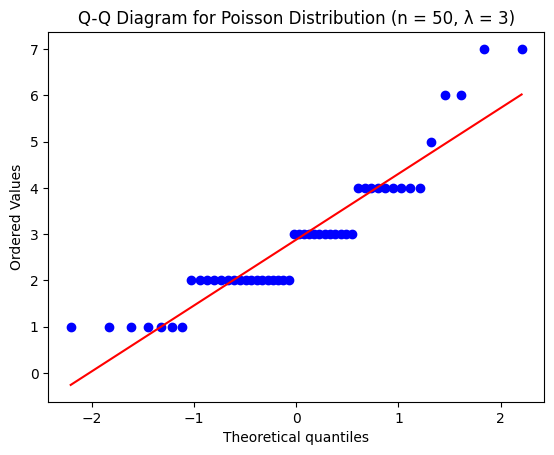


Wilk-Shapiro Test for n = 50, λ = 3:
Statistic: 0.8752963542938232, p_value: 8.079884719336405e-05
The distribution is not normal.


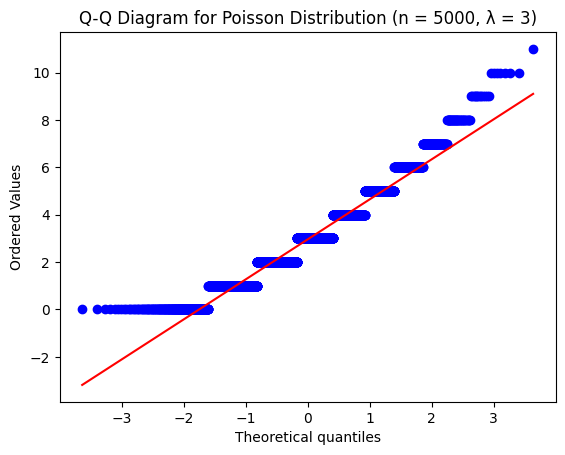


Wilk-Shapiro Test for n = 5000, λ = 3:
Statistic: 0.948311984539032, p_value: 9.394981731991843e-39
The distribution is not normal.


In [42]:
import scipy.stats as stats

lambda_val = 3
sample_sizes = [5, 50, 5000]

for n in sample_sizes:
    poisson_samples = np.random.poisson(lambda_val, n)
    stats.probplot(poisson_samples, dist="norm", plot=plt)
    plt.title(f'Q-Q Diagram for Poisson Distribution (n = {n}, λ = {lambda_val})')
    plt.show()

    statistic, p_value = stats.shapiro(poisson_samples)
    print(f"\nWilk-Shapiro Test for n = {n}, λ = {lambda_val}:")
    print(f"Statistic: {statistic}, p_value: {p_value}")

    if p_value < 0.05:
        print("The distribution is not normal.")
    else:
        print("The distribution can be assumed to be normal.")

    print("="*50)